# Misharin (GSE127803) - Annotation (of filtered data) using the Leiden algorithm
Mice aged 8-10 weeks were instilled intratracheally with control particles or crocidolite asbestos fibers to induce lung fibrosis. Lungs were then harvested at different time points (depending on the analysis method).
Single-cell RNA sequencing was done on a HiSeq 4000 instrument (Illumina) using Chromium Single Cell v2 Reagent Kit and Controller for the library preparation.

In [87]:
import helper_classes_DanielStrobl
import scanpy
import matplotlib.pyplot as plt
import json

plt.rcParams['figure.figsize'] = (15, 15)
scanpy.settings.verbosity = 0
scanpy.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


In [88]:
base = "GSE127803_RAW/"
output = "data/"

In [89]:
misharin_filtered = scanpy.read(output + 'misharin_Emma_processed_without_annotation.h5ad')

## Creating UMAP to annotate:

In [90]:
scanpy.pp.neighbors(misharin_filtered, n_pcs=30)
scanpy.tl.umap(misharin_filtered)

In [91]:
scanpy.tl.leiden(misharin_filtered)

In [92]:
scanpy.tl.leiden(misharin_filtered, key_added="leiden_res0_1", resolution=0.1)
scanpy.tl.leiden(misharin_filtered, key_added="leiden_res0_3", resolution=0.3)
scanpy.tl.leiden(misharin_filtered, key_added="leiden_res0_35", resolution=0.35)
scanpy.tl.leiden(misharin_filtered, key_added="leiden_res0_5", resolution=0.5)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  c

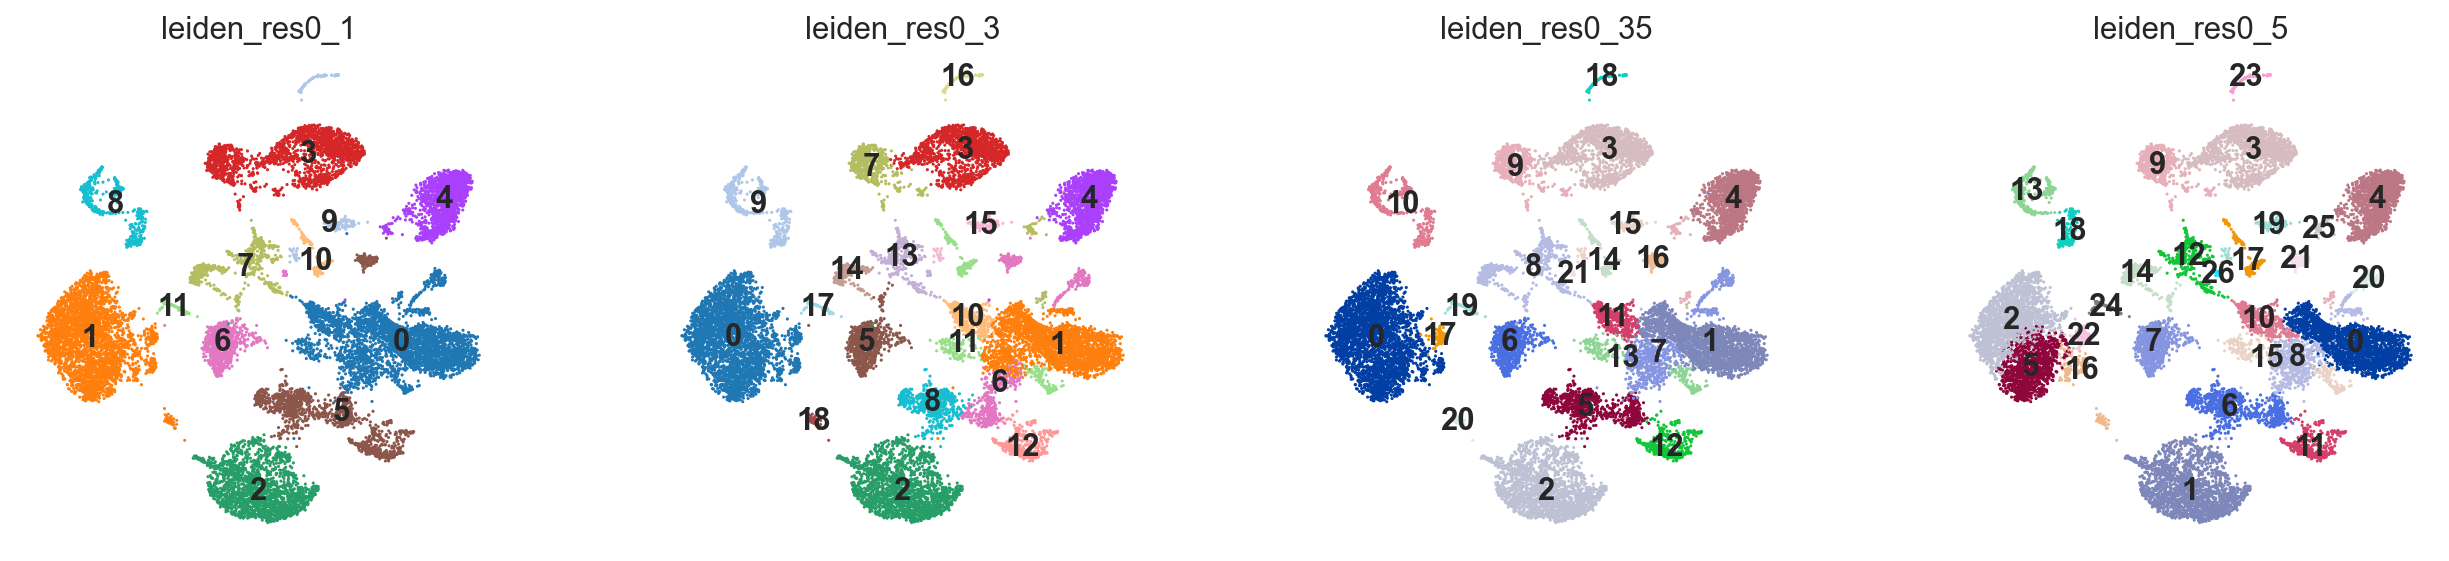

In [93]:
scanpy.pl.umap(
    misharin_filtered,
    color=["leiden_res0_1", "leiden_res0_3", "leiden_res0_35", "leiden_res0_5"],
    legend_loc="on data",
)

The Leiden algorithm with a resolution of 0.35 will be used for the annotation.

## Defining more marker genes:
Source: https://docs.google.com/spreadsheets/d/1nUMZA_I9bliJX1-x_-KRqKrF_6e229gx_l_GtOwt0rU/edit#gid=0

In [94]:
# Opening JSON file
f = open(output + 'marker_genes.json')

# returns JSON object as
# a dictionary
marker_genes = json.load(f)

# Closing file
f.close()

In [95]:
marker_genes_in_data = dict()
for ct, markers in marker_genes.items():
    markers_found = list()
    for marker in markers:
        if marker in misharin_filtered.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found

## Finer annotation using marker genes:
Marker genes mentioned in the paper only belong to macrophages and alveolar macrophages.

In [97]:
 take_a_further_look = [
    "CD4 T-cells",
    "CD8 T-cells"
]

CD4 T-CELLS:


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


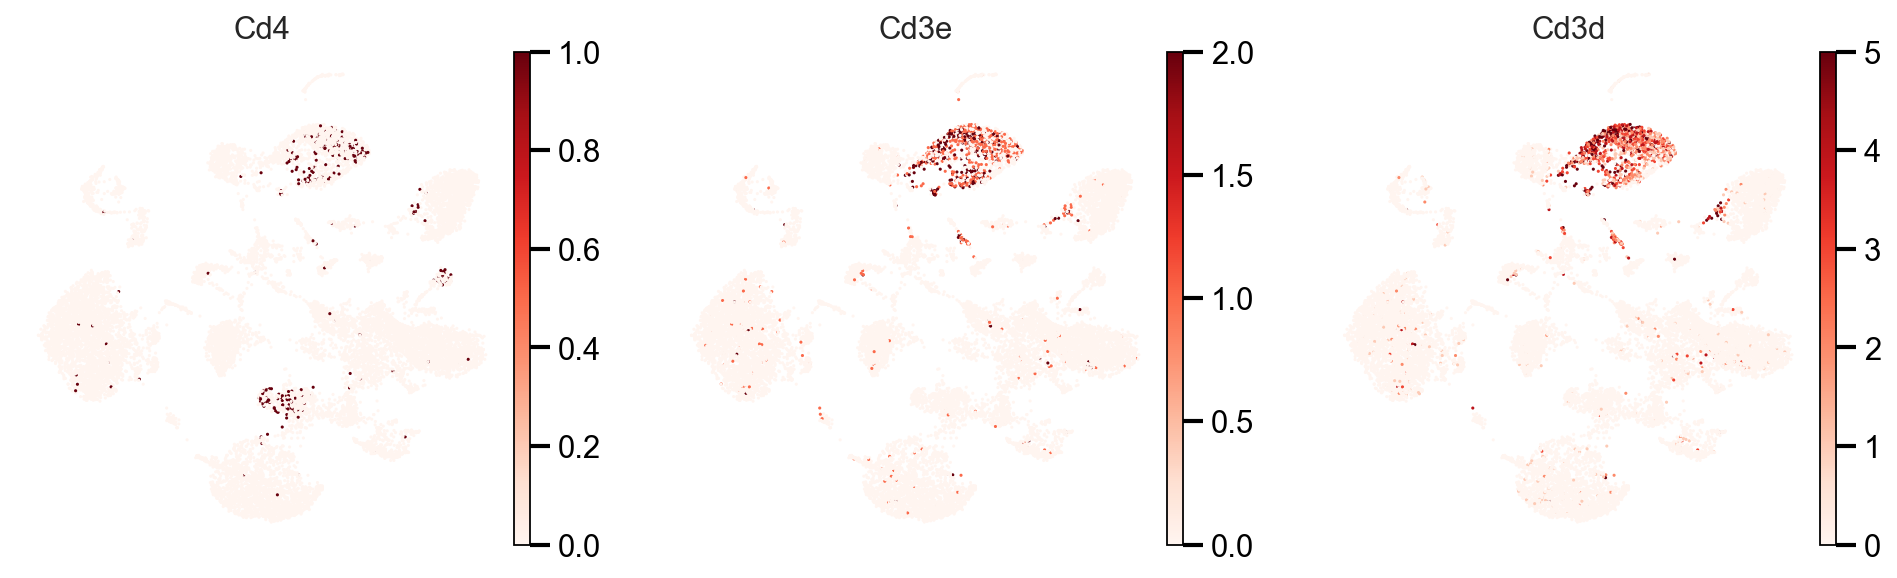





CD8 T-CELLS:


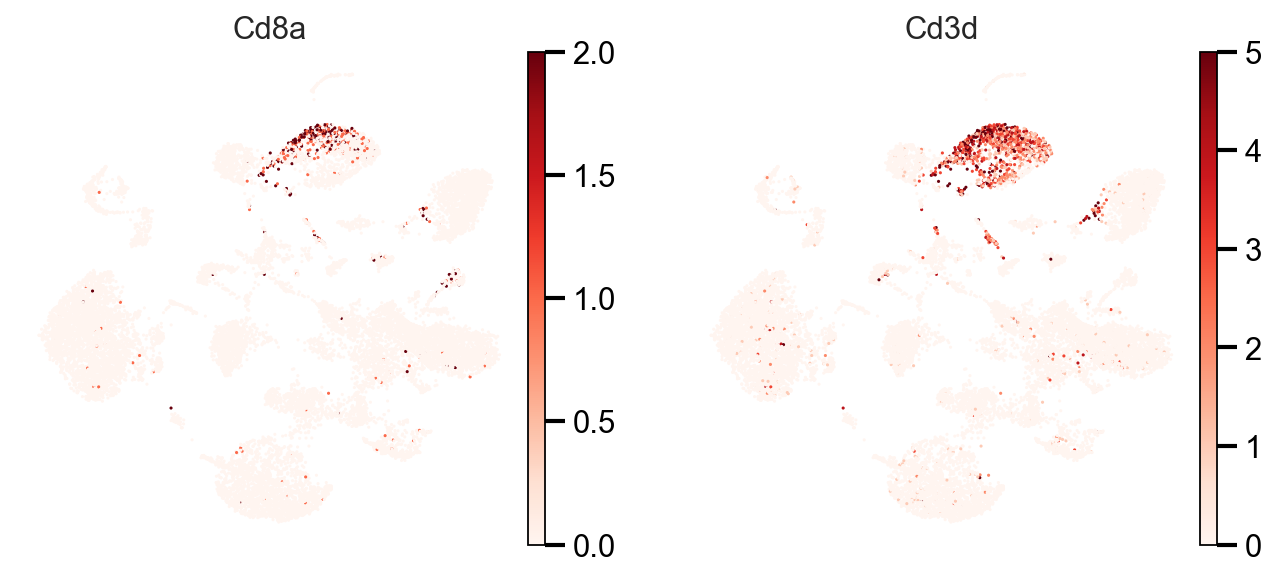

In [98]:
for ct in take_a_further_look:   #marker_genes_in_data.keys():
    print(f"{ct.upper()}:")  # print cell subtype name
    scanpy.pl.umap(
        misharin_filtered,
        color=marker_genes_in_data[ct],
        vmin=0,
        vmax="p99",  # set vmax to the 99th percentile of the gene count instead of the maximum, to prevent outliers from making expression in other cells invisible. Note that this can cause problems for extremely lowly expressed genes.
        sort_order=False,  # do not plot highest expression on top, to not get a biased view of the mean expression among cells
        frameon=False,
        cmap="Reds",  # or choose another color map e.g. from here: https://matplotlib.org/stable/tutorials/colors/colormaps.html
    )
    print("\n\n\n")  # print white space for legibility

In [99]:
cl_annotation = {
    "0": "AT2",
    "1": "Classical monocytes",
    "2": "Alveolar macrophages",
    "3": "T-cells",
    "4": "B-cells",
    "5": "Interstitial macrophages",
    "6": "Neutrophils",
    "7": "7",
    "8": "Endothelial",
    "9": "NK cells",
    "10": "Transitioning epithelial",
    "11": "11",
    "12": "Dendritic cells",
    "13": "Non-classical monocytes",
    "14": "14",
    "15": "Myofibroblasts",
    "16": "Dendritic cells Ccr7-hi",
    "17": "AT2",
    "18": "Lymphatic endothelial",
    "19": "AT1",
    "20": "Lipofibroblasts",
    "21": "SMCs"
}

In [100]:
misharin_filtered.obs["manual_celltype_annotation"] = misharin_filtered.obs.leiden_res0_35.map(
    cl_annotation).astype("category")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


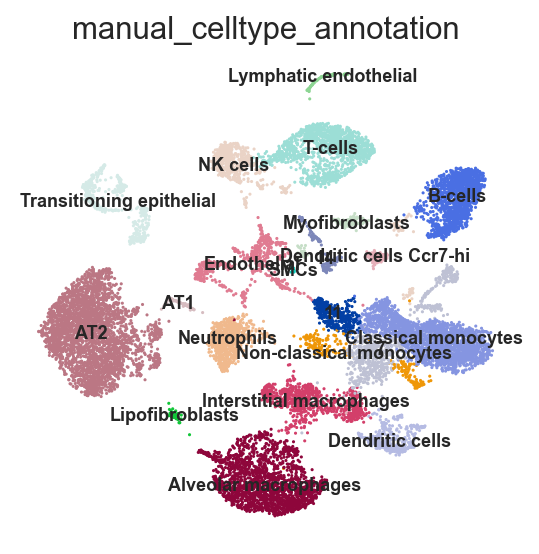

In [101]:
scanpy.pl.umap(misharin_filtered, color="manual_celltype_annotation", legend_loc="on data", legend_fontsize="xx-small")

## Using differentially expressed genes to annotate the remaining clusters:

In [102]:
misharin_filtered.uns['log1p']["base"] = None

In [103]:
scanpy.tl.rank_genes_groups(
    misharin_filtered, groupby="leiden_res0_35", method="wilcoxon", key_added="dea_leiden_0_35"
)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

In [104]:
scanpy.tl.filter_rank_genes_groups(
    misharin_filtered, min_in_group_fraction=0.2, max_out_group_fraction=0.2, key="dea_leiden_0_35",
    key_added="dea_leiden_0_35_filtered",
)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


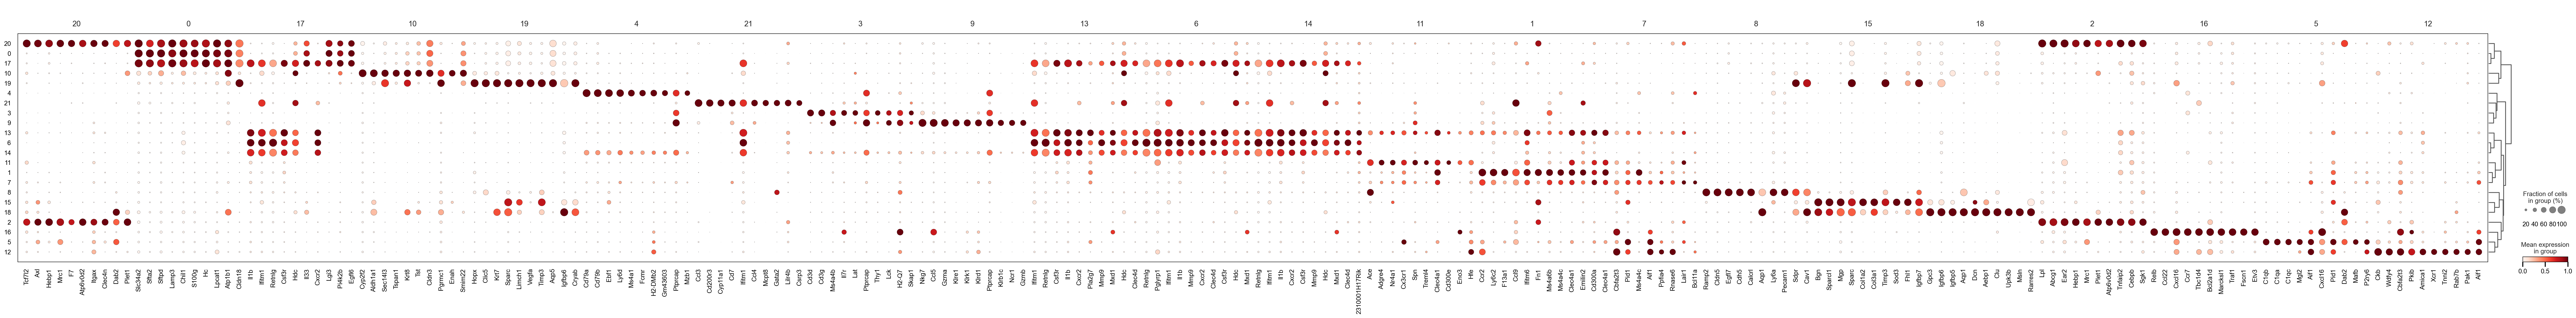

In [105]:
scanpy.pl.rank_genes_groups_dotplot(
    misharin_filtered, groupby="leiden_res0_35", standard_scale="var", n_genes=10, key="dea_leiden_0_35_filtered",
)

### Unannotated clusters:
**7:**
- Conclusion: Dendritic cells

**11:**
- Conclusion: Non-classical monocytes

**14:**
- Conclusion: Neutrophils

In [106]:
cl_annotation = {
    "0": "AT2",
    "1": "Classical monocytes",
    "2": "Alveolar macrophages",
    "3": "T-cells",
    "4": "B-cells",
    "5": "Interstitial macrophages",
    "6": "Neutrophils",
    "7": "Dendritic cells",   # -> annotated by using differentially expressed genes
    "8": "Endothelial",
    "9": "NK cells",
    "10": "Transitioning epithelial",
    "11": "Non-classical monocytes",   # -> annotated by using differentially expressed genes
    "12": "Dendritic cells",
    "13": "Non-classical monocytes",
    "14": "Neutrophils",   # -> annotated by using differentially expressed genes
    "15": "Myofibroblasts",
    "16": "Dendritic cells Ccr7-hi",
    "17": "AT2",
    "18": "Lymphatic endothelial",
    "19": "AT1",
    "20": "Lipofibroblasts",
    "21": "SMCs"
}

In [107]:
misharin_filtered.obs["manual_celltype_annotation"] = misharin_filtered.obs.leiden_res0_35.map(
    cl_annotation).astype("category")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


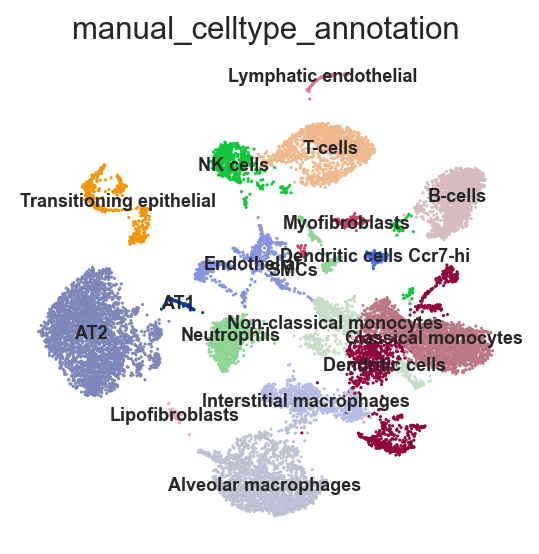

In [108]:
scanpy.pl.umap(misharin_filtered, color="manual_celltype_annotation", legend_loc="on data", legend_fontsize="xx-small")

## Additional dotplot:

In [109]:
dotplot_markers = {
    ct: [m for m in ct_markers if m in misharin_filtered.var.index]
    for ct, ct_markers in marker_genes.items()
    if ct in marker_genes_in_data.keys()
}

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


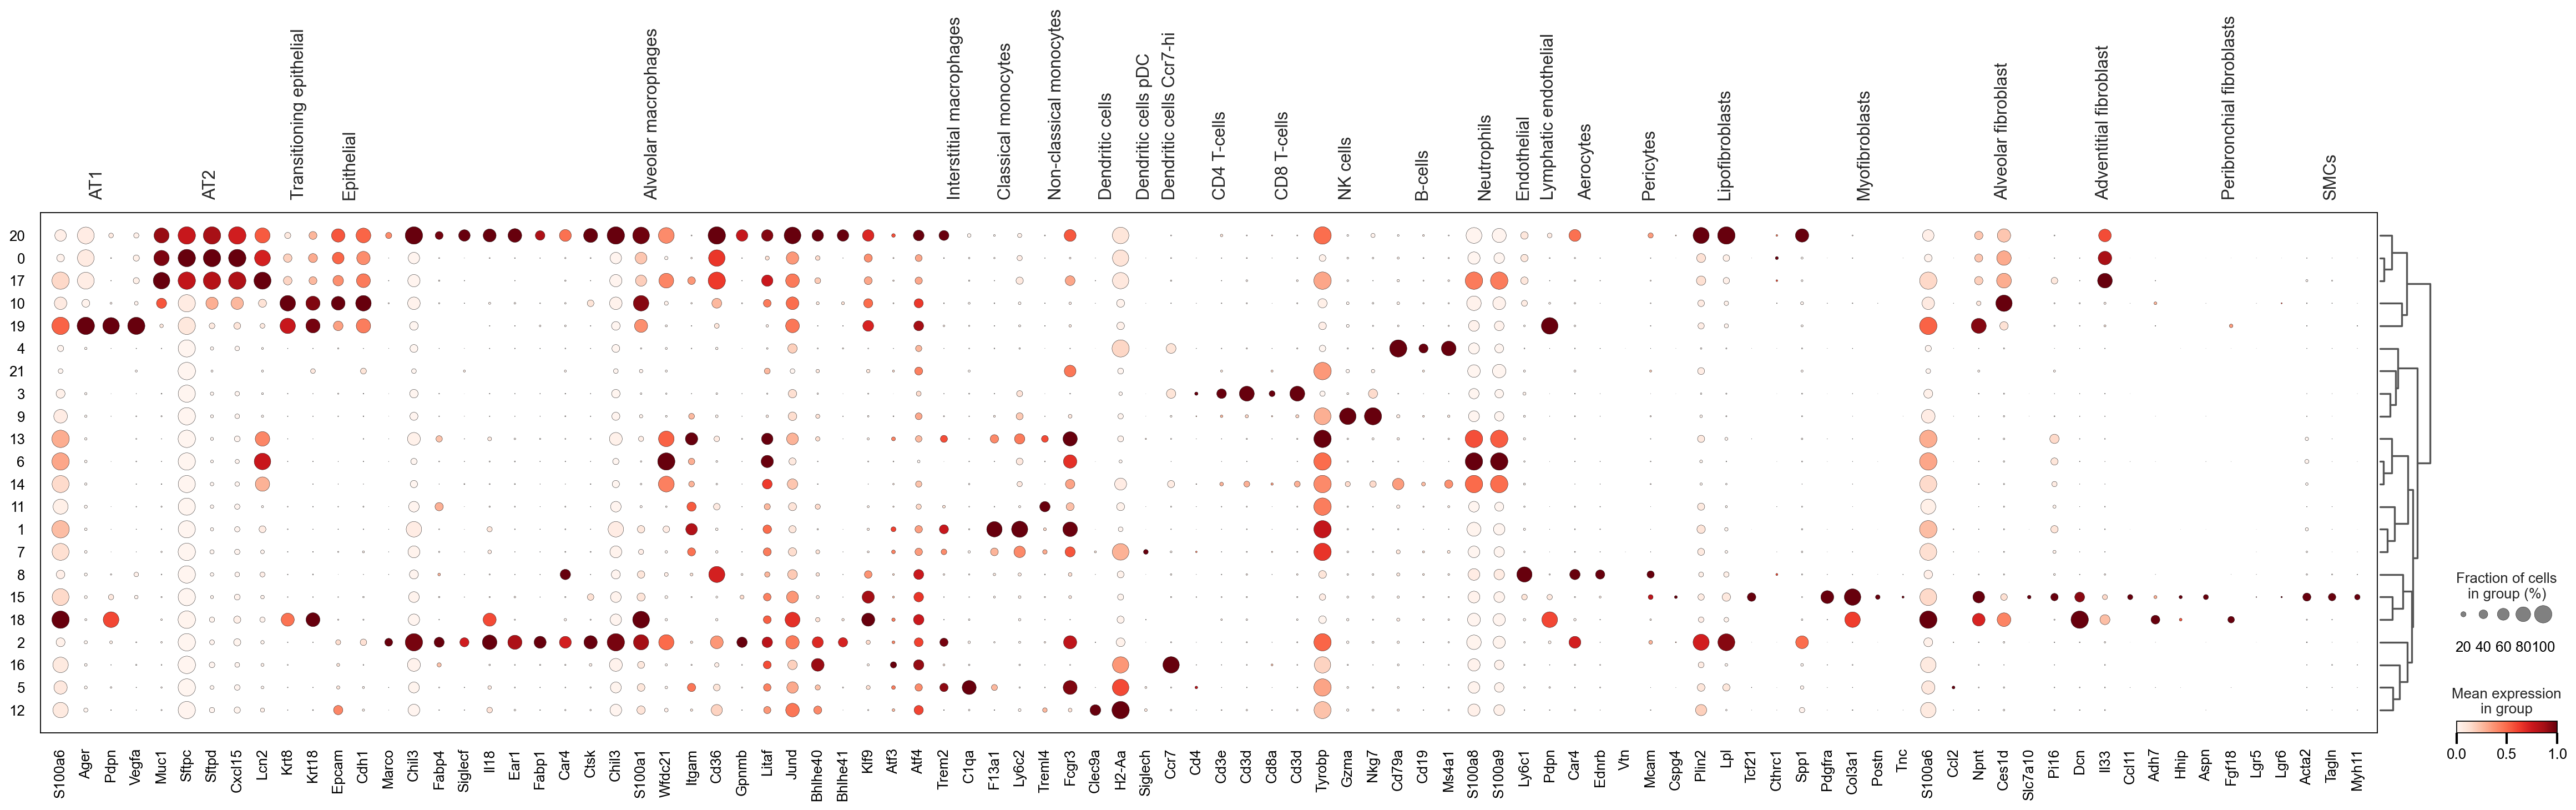

In [110]:
scanpy.pl.dotplot(
    misharin_filtered,
    groupby="leiden_res0_35",
    var_names=dotplot_markers,
    standard_scale="var",
    dendrogram=True
)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


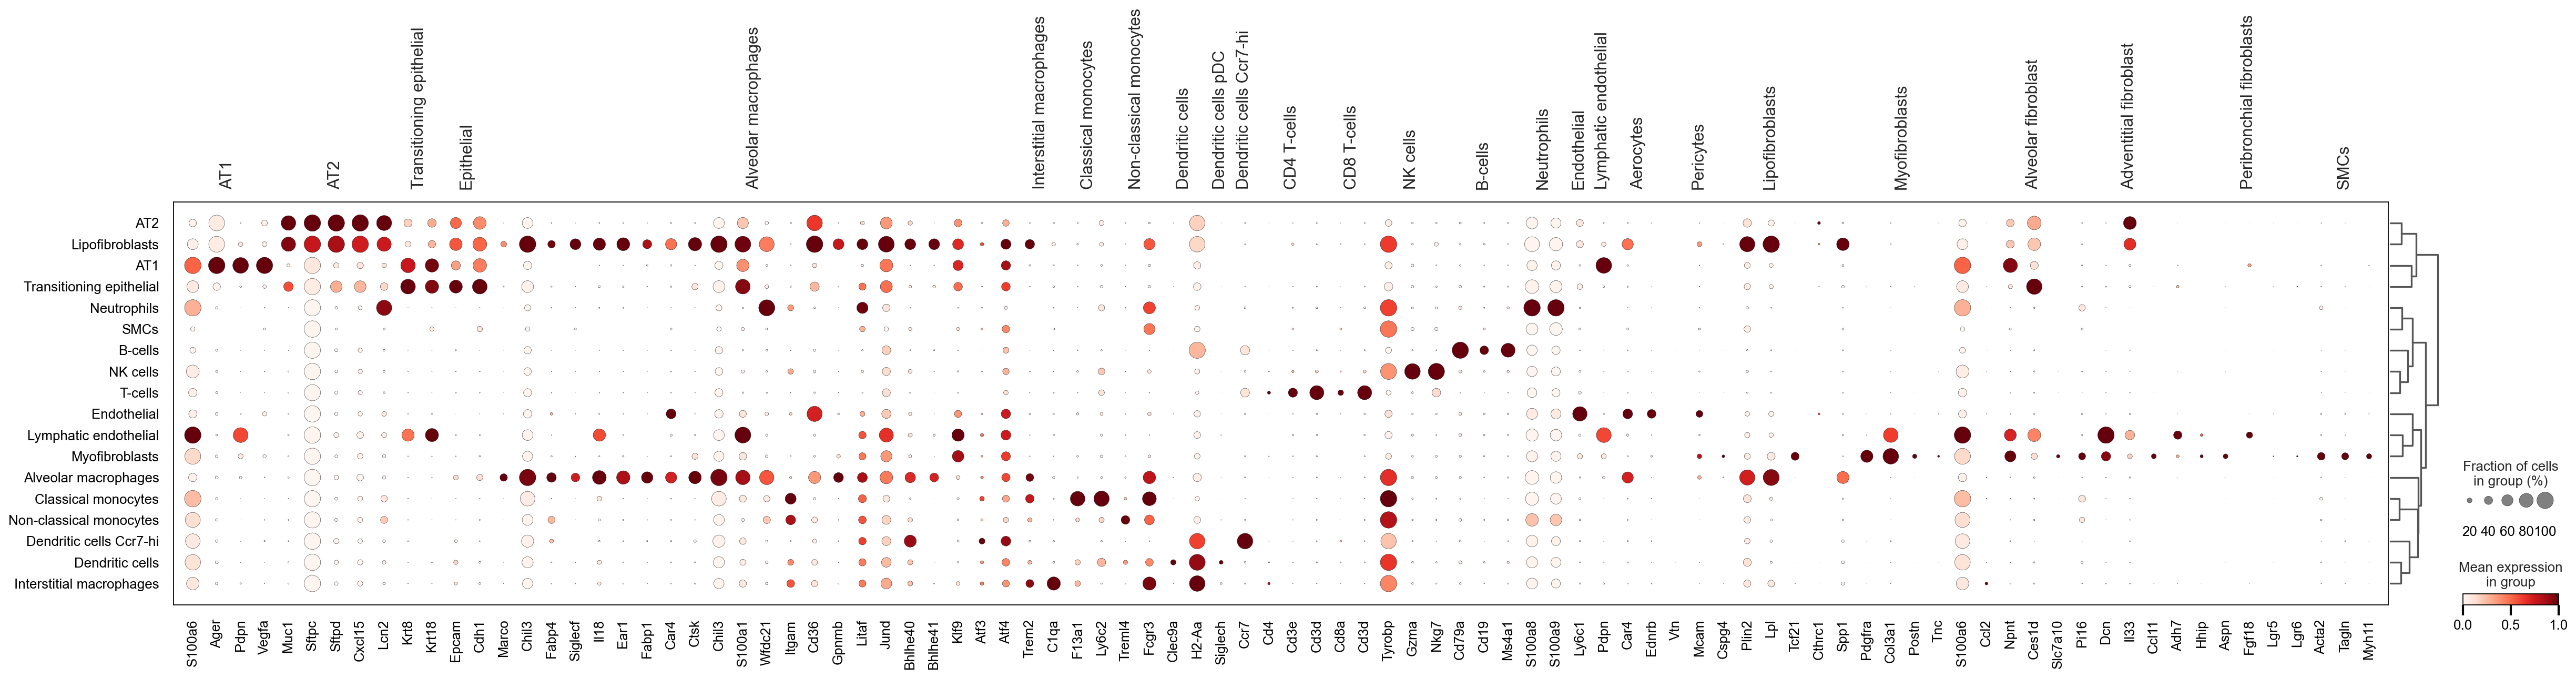

In [112]:
scanpy.pl.dotplot(
    misharin_filtered,
    var_names={
        ct: marker_genes_in_data[ct] for ct in dotplot_markers
    },  # gene names grouped by cell type in a dictionary
    groupby="manual_celltype_annotation",
    standard_scale="var",  # normalize gene scores from 0 to 1
    dendrogram=True
)

## Saving the annotated *misharin_filtered*:

In [47]:
misharin_filtered.write(output + "misharin_Emma_processed_annotated_leiden.h5ad")

TypeError: Can't implicitly convert non-string objects to strings

Above error raised while writing key 'names' of <class 'h5py._hl.group.Group'> to /